Hossein Dahaei 40252521002

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from scipy.sparse import diags


## Define Methods

In [2]:
def ratio_cut(W,K):
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    eig_values,eig_vectors = np.linalg.eig(L)
    eigens = [(eig_values[i],eig_vectors[i]) for i in range(len(eig_values))]
    eigens = sorted(eigens,key=lambda a:a[0])

    clusters = np.empty((0, len(eig_values)))
    for i in range(K):
        clusters = np.vstack([clusters, eigens[i][1]])

    clusters = clusters.T
    real_clusters = np.argmax(clusters, axis=1)

    print("davies_bouldin_score = ",davies_bouldin_score(W, real_clusters))

    pos = nx.spring_layout(G,seed=45)
    nx.draw(G, pos,node_color=real_clusters, with_labels=False, cmap=plt.cm.Set1)
    plt.show()


In [3]:
def normalized_cut(W,K):
    D = np.diag(np.sum(W, axis=1))
    L = D - W
    degree_matrix_sqrt_inv = diags(1 / np.sqrt(np.sum(W, axis=1)), format='csc')
    Ls = degree_matrix_sqrt_inv @ L @ degree_matrix_sqrt_inv
    eig_values,eig_vectors = np.linalg.eig(Ls)
    eigens = [(eig_values[i],eig_vectors[i]) for i in range(len(eig_values))]
    eigens = sorted(eigens,key=lambda a:a[0])
    clusters = np.empty((0, len(eig_values)))
    for i in range(K):
        clusters = np.vstack([clusters, eigens[i][1]])
    clusters = clusters.T

    real_clusters = np.argmax(clusters, axis=1)
    print("davies_bouldin_score = ",davies_bouldin_score(W, real_clusters))

    pos = nx.spring_layout(G,seed=45)
    nx.draw(G, pos,node_color=real_clusters, with_labels=False, cmap=plt.cm.Set1)
    plt.show()

In [4]:
def average_cut(W,K):
    eig_values,eig_vectors = np.linalg.eig(W)

    eigens = [(eig_values[i],eig_vectors[i]) for i in range(len(eig_values))]
    eigens = sorted(eigens,key=lambda a:a[0],reverse=True)

    clusters = np.empty((0, len(eig_values)))
    for i in range(K):
        clusters = np.vstack([clusters, eigens[i][1]])

    clusters = clusters.T
    real_clusters = np.argmax(clusters, axis=1)

    print("davies_bouldin_score = ",davies_bouldin_score(W, real_clusters))
    pos = nx.spring_layout(G,seed=45)
    nx.draw(G, pos,node_color=real_clusters, with_labels=False, cmap=plt.cm.Set1)
    plt.show()

In [5]:
def modularity_cut(W,K):
    D = np.diag(np.sum(W, axis=1))
    Q = (W - (D@D.T)/D.trace())/D.trace()
    eig_values,eig_vectors = np.linalg.eig(Q)

    eigens = [(eig_values[i],eig_vectors[i]) for i in range(len(eig_values))]
    eigens = sorted(eigens,key=lambda a:a[0],reverse=True)

    clusters = np.empty((0, len(eig_values)))
    for i in range(K):
        clusters = np.vstack([clusters, eigens[i][1]])

    clusters = clusters.T

    real_clusters = np.argmax(clusters, axis=1)


    print("davies_bouldin_score = ",davies_bouldin_score(W, real_clusters))
    pos = nx.spring_layout(G,seed=45)
    nx.draw(G, pos,node_color=real_clusters, with_labels=False, cmap=plt.cm.Set1)
    plt.show()

# Cluster Karate club

In [6]:
G = nx.karate_club_graph()
K_karate = 2 # number of clusters
# Extract the adjacency matrix
W_karate = nx.adjacency_matrix(G).toarray()
W_karate.shape

(34, 34)

davies_bouldin_score =  5.064710122704962


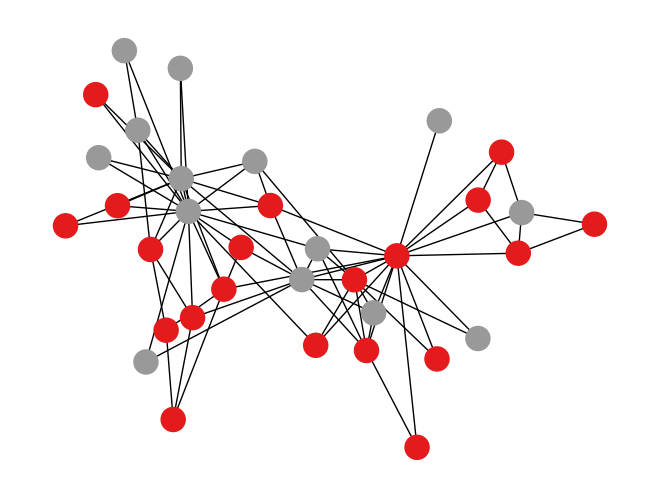

In [7]:
ratio_cut(W_karate,K_karate)

davies_bouldin_score =  4.663765374895417


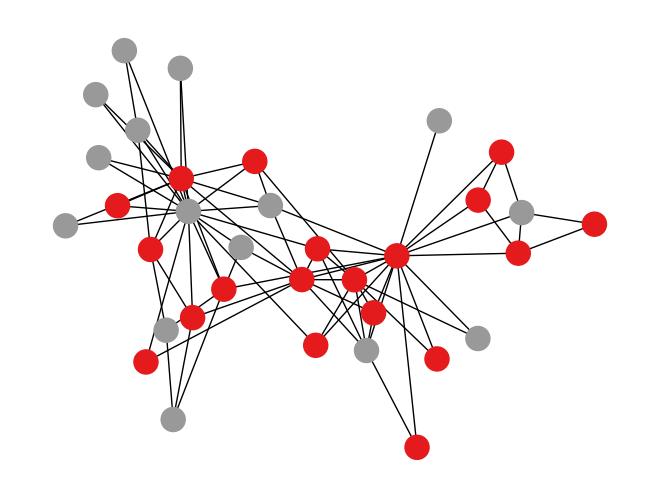

In [8]:
normalized_cut(W_karate,K_karate)

davies_bouldin_score =  5.6129313938263135


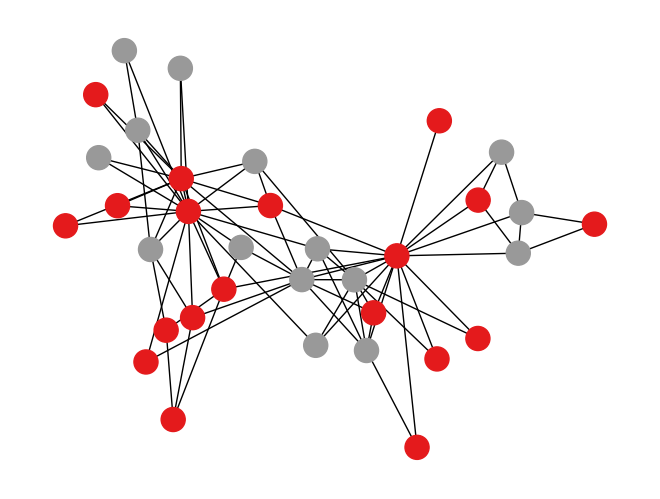

In [9]:
average_cut(W_karate,K_karate)

davies_bouldin_score =  3.605227423328642


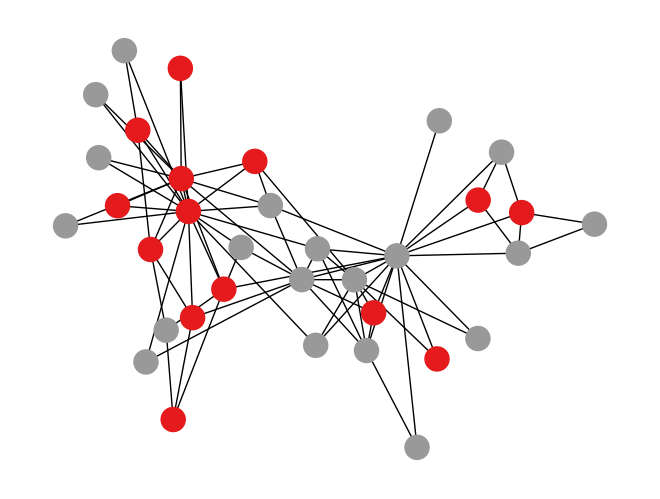

In [10]:
modularity_cut(W_karate,K_karate)

# Cluster Facebook

In [11]:
G = nx.read_edgelist('file.tsv', delimiter=' ')
K_facebook = 5 # number of clusters
# Extract the adjacency matrix
W_facebook = nx.adjacency_matrix(G).toarray()
W_facebook.shape

(2888, 2888)

davies_bouldin_score =  19.314666302389565


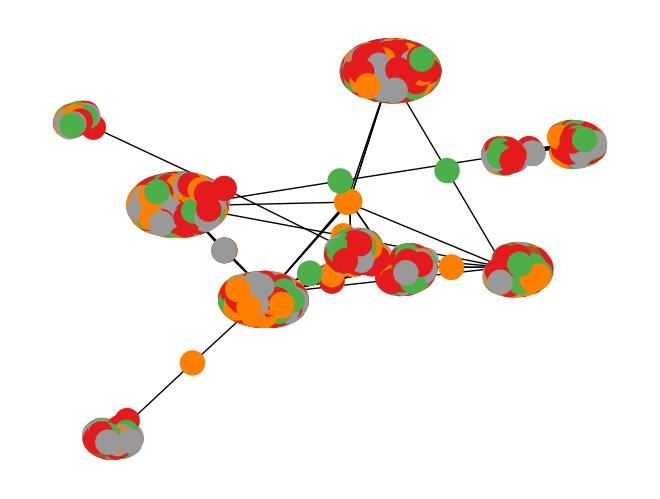

In [12]:
ratio_cut(W_facebook,K_facebook)

davies_bouldin_score =  24.087494508202923


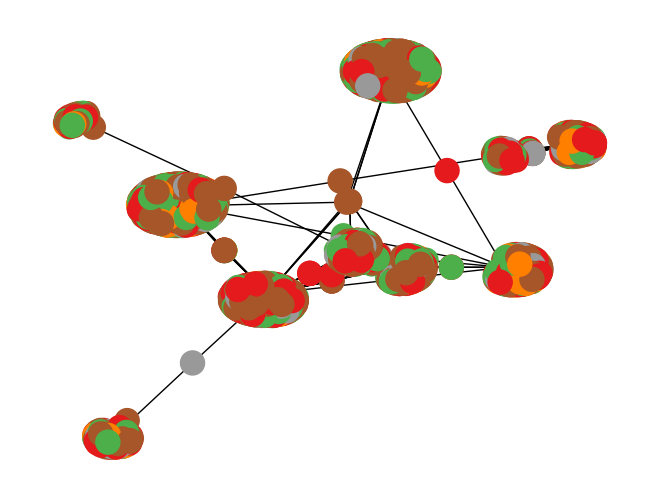

In [13]:
normalized_cut(W_facebook,K_facebook)

davies_bouldin_score =  14.105592117601585


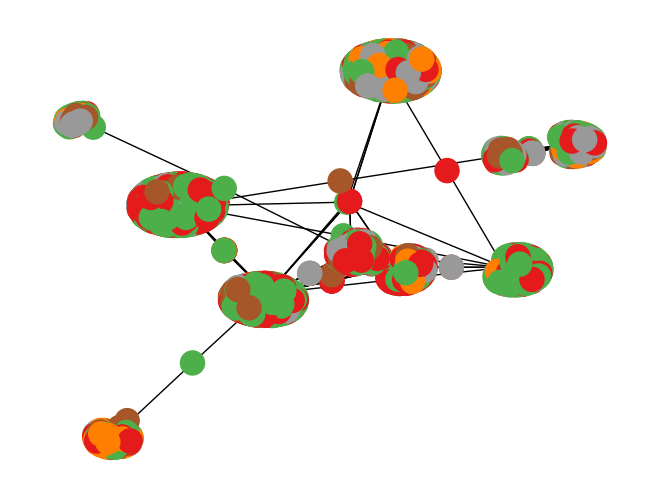

In [14]:
average_cut(W_facebook,K_facebook)

davies_bouldin_score =  23.413965213405426


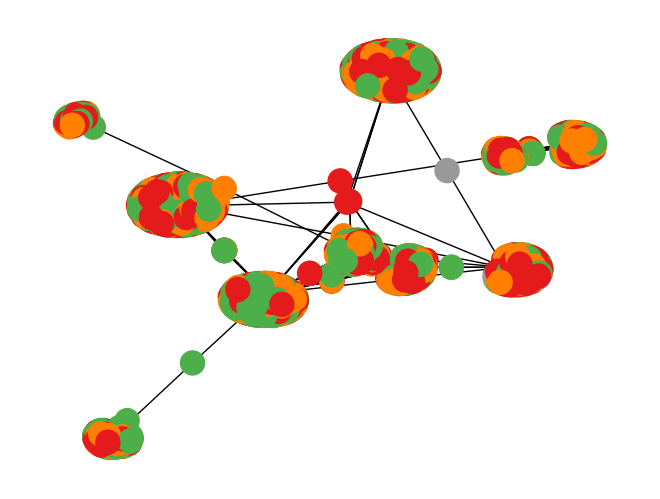

In [15]:
modularity_cut(W_facebook,K_facebook)